Project Overview: HR Employee Attrition Analysis
1. Project Title: Employee Attrition Analysis and Prediction

2. Project Goal:

The primary goal of this project is to understand the factors that contribute to employee attrition within a company and to develop a predictive model that can identify employees who are at a higher risk of leaving.  The insights gained from this analysis can be used to inform HR policies and develop targeted interventions to improve employee retention.

3. Dataset Description:

The dataset used for this project is the "HR-Employee-Attrition.csv" dataset. It contains a variety of information about employees, including:

Demographic information: Age, Gender, MaritalStatus

Job-related factors: Department, JobRole, JobLevel

Compensation: MonthlyIncome, MonthlyRate, DailyRate, HourlyRate

Work history: YearsAtCompany, TotalWorkingYears, NumCompaniesWorked

Satisfaction and other metrics: JobSatisfaction, EnvironmentSatisfaction, WorkLifeBalance, RelationshipSatisfaction

Travel-related information: BusinessTravel

Other factors: OverTime, StockOptionLevel, Education, EducationField, DistanceFromHome

The target variable is 'Attrition', which indicates whether an employee left the company (1) or stayed (0).

4. Methodology:

The project will be conducted using the following methodology:

Data Loading and Exploration:

Load the dataset into a pandas DataFrame.

Explore the data using descriptive statistics, data visualization, and by checking data types and missing values.

Exploratory Data Analysis (EDA):

Visualize the relationship between various independent variables and the target variable ('Attrition') using box plots and count plots.  Key variables to be explored include:

Numerical Variables: Age, DailyRate, DistanceFromHome, Education, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, YearsAtCompany

Categorical Variables: BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime

Analyze the distribution of employees across different categories and the attrition rate within each category.

Identify potential correlations and patterns in the data.

Feature Engineering:

Handle categorical variables (e.g., one-hot encoding).

Scale numerical features.

Address any data imbalance issues (e.g., using SMOTE).

Model Building and Evaluation:

Develop and compare several classification models to predict attrition (e.g., Logistic Regression, Random Forest).

Evaluate model performance using appropriate metrics (e.g., precision, recall, F1-score, ROC AUC).

Fine-tune the best-performing model using techniques like hyperparameter tuning.

Feature Importance Analysis:

Determine the importance of each feature in the predictive model.

Visualize feature importance to identify the key drivers of attrition.

Business Insights and Recommendations:

Based on the analysis, provide actionable insights and recommendations to the HR department to improve employee retention.

These recommendations may include strategies to address factors such as overtime, compensation, job level, and work-life balance.

5. Expected Outcomes:

A comprehensive understanding of the factors that influence employee attrition.

A predictive model that can identify employees at risk of leaving.

A set of data-driven recommendations for HR to improve employee retention and reduce turnover costs.

Visualizations and reports that effectively communicate the findings to stakeholders.

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv(r'C:/Users/HP 03306897941/Desktop/Junaid/Data Science/Data Science Projects/HR Employee Retention/HR-Employee-Attrition.csv')

# Initial exploration
print(df.shape)
print(df.info())
print(df.describe())

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

In [6]:
# Check for missing values
print(df.isnull().sum())

# Drop columns with single unique value or not useful for prediction
cols_to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
df = df.drop(cols_to_drop, axis=1)

# Convert target variable to binary (1 for 'Yes', 0 for 'No')
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Exploratory Data Analysis (EDA)

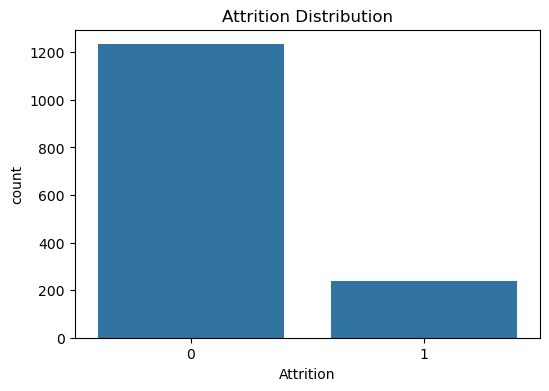

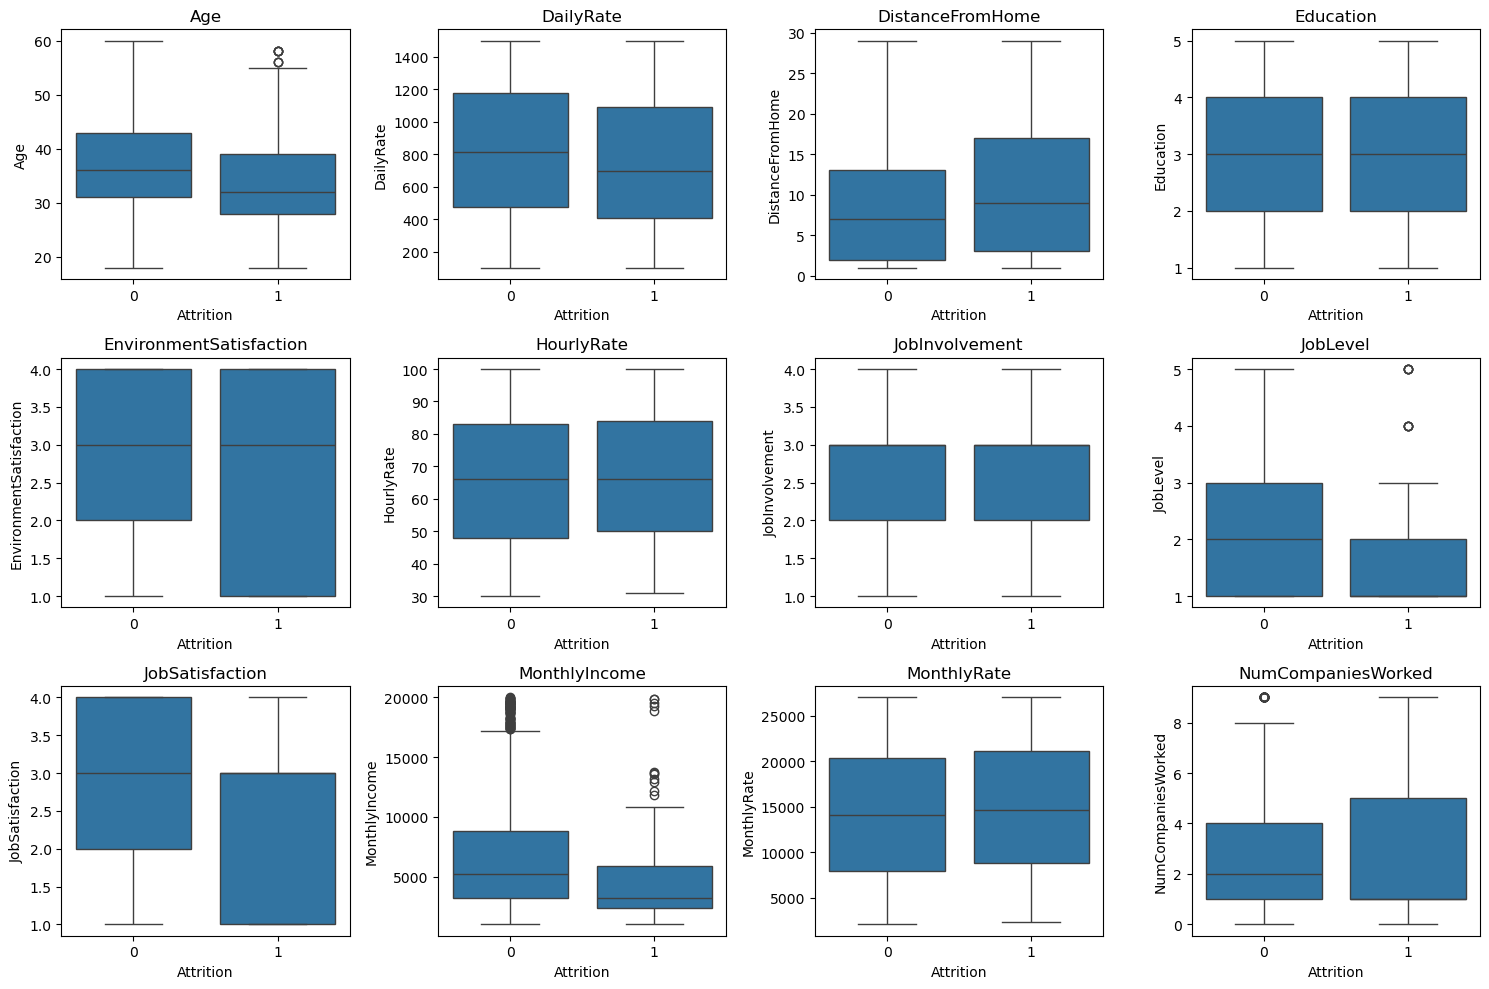

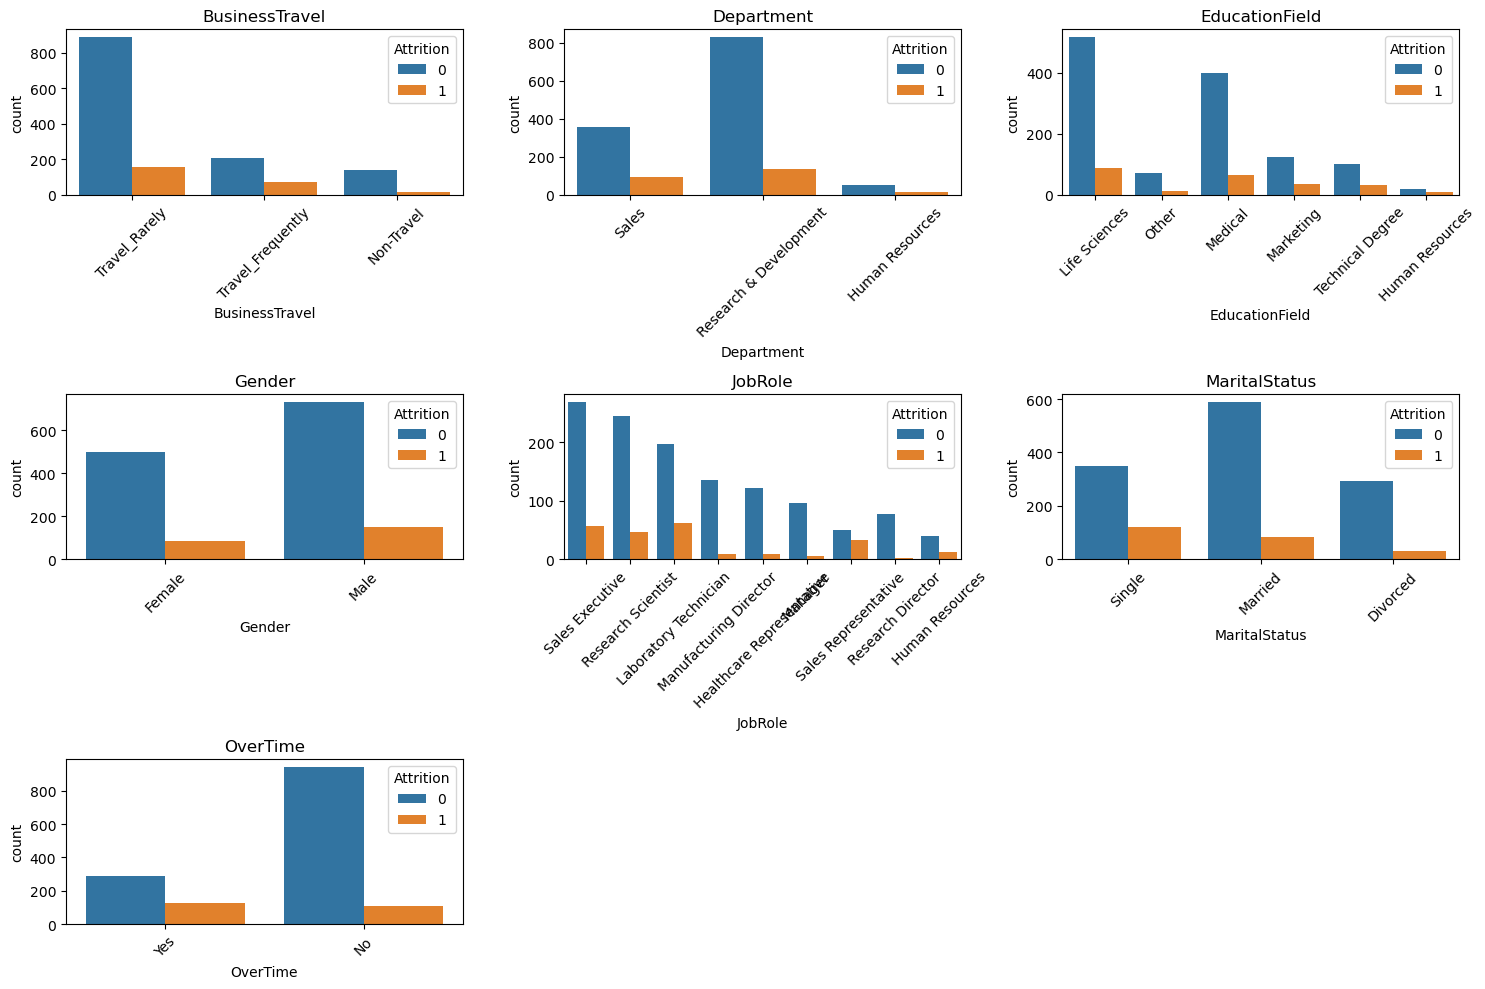

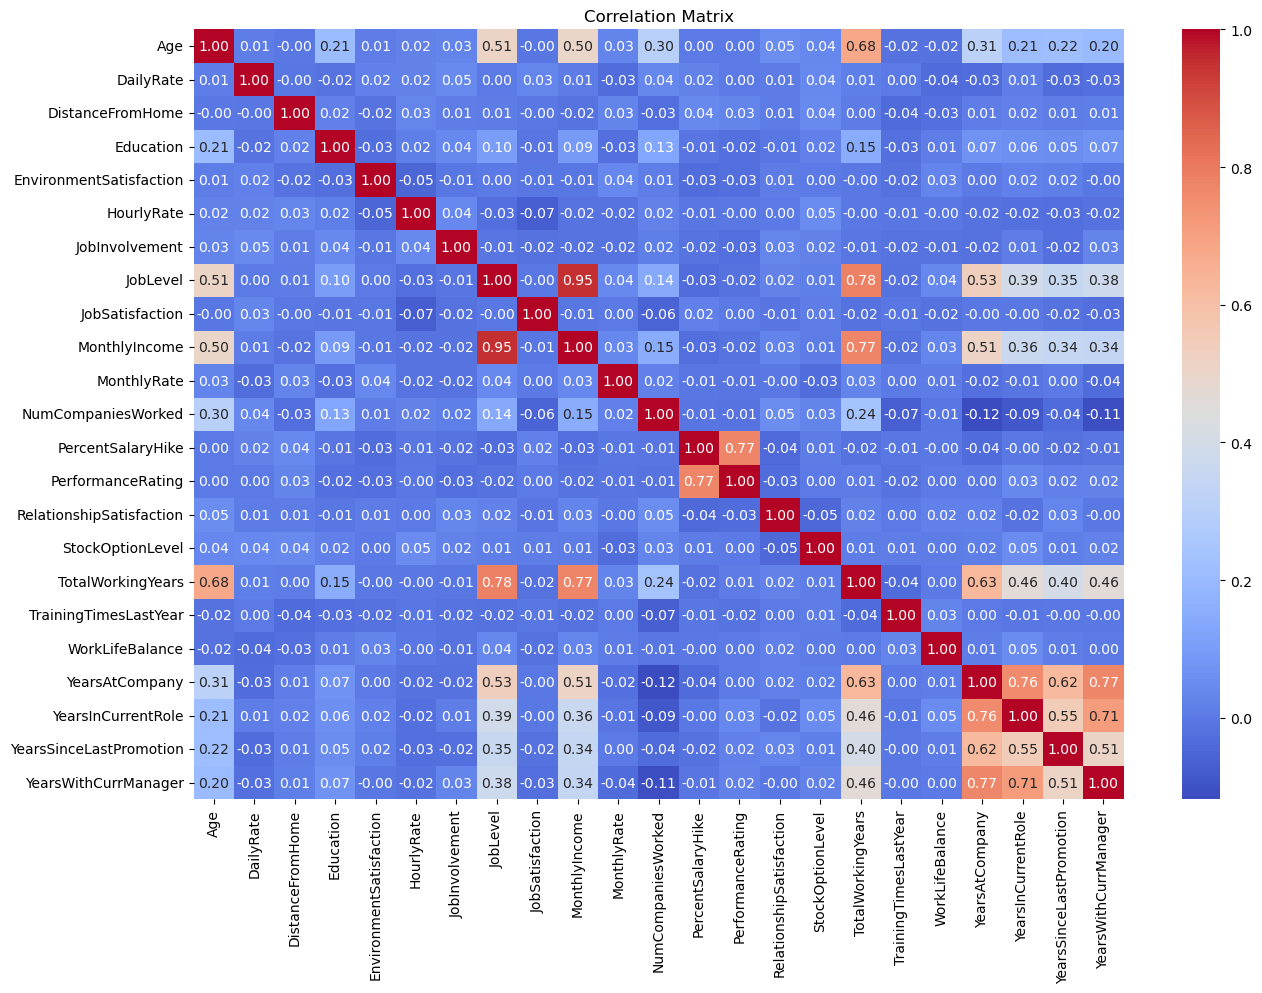

In [7]:
# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Attrition Distribution')
plt.show()

# Numerical features analysis
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[:12]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=y, y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

# Categorical features analysis
cat_cols = X.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, hue=y, data=df)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

 "Attrition Distribution",

 Key Observations:
Class Imbalance:

Class 0 (No Attrition): ~1200 employees (majority class)

Class 1 (Attrition): ~200 employees (minority class)

Imbalance Ratio: ~6:1 (No Attrition : Attrition)

Interpretation:

The dataset is highly imbalanced, with significantly fewer employees leaving the company (attrition = 1) compared to those staying (attrition = 0).

This imbalance suggests that:

Predictive models may bias toward the majority class (predicting "No Attrition" more frequently).

Evaluation metrics like accuracy can be misleading. Precision, recall, F1-score, or ROC-AUC are more appropriate.

Business Impact:

The attrition rate is ~14% (200/1400), which is a critical concern for HR.

Addressing this imbalance is essential for:

Retention strategies: Identifying at-risk employees.

Cost reduction: Hiring/training new employees is expensive.



distribution of Age for two groups of employees based on Attrition:

Attrition = 0: Employees who did not leave the company (stayed).
Attrition = 1: Employees who left the company (attrition occurred).
Here's a breakdown of the analysis based on the visual information:

For Employees Who Stayed (Attrition = 0):

Median Age: The horizontal line inside the box represents the median age. It appears to be around 35-36 years old.
Interquartile Range (IQR): The box itself represents the middle 50% of the data. The bottom of the box is around 31-32 years old (25th percentile), and the top of the box is around 42-43 years old (75th percentile). This means that half of the employees who stayed were between approximately 32 and 43 years old.
Whiskers: The lines extending from the box (whiskers) typically show the range of the data, excluding outliers. The lower whisker extends down to around 18 years old, and the upper whisker extends up to 60 years old. This indicates a wider age range for employees who stayed.
Outliers: There are no visible points outside the whiskers, suggesting no significant outliers in the age distribution for this group.
For Employees Who Left (Attrition = 1):

Median Age: The median age for employees who left seems to be slightly lower than those who stayed, appearing to be around 32-33 years old.
Interquartile Range (IQR): The box for the attrition group spans from approximately 28-29 years old (25th percentile) to around 39-40 years old (75th percentile). This IQR is also somewhat narrower than the group who stayed.
Whiskers: The lower whisker extends down to around 18 years old, similar to the other group. The upper whisker extends up to around 55 years old, which is slightly lower than the maximum age of those who stayed.
Outliers: There are a few points above the upper whisker, indicating potential outliers of older employees who experienced attrition. These points appear to be around 56-58 years old.
Comparison between the two groups:

Central Tendency: The median age of employees who experienced attrition appears to be slightly lower than the median age of those who stayed. This suggests that younger employees might be more likely to leave the company.
Spread: The interquartile range (the length of the box) for the attrition group is slightly narrower than for the group who stayed, indicating less variability in the middle 50% of ages for those who left. The overall range (considering the whiskers) is also somewhat smaller for the attrition group.
Outliers: The presence of older outliers in the attrition group is interesting and might warrant further investigation.
Possible Implications:

The slightly lower median age for employees who left could indicate that factors affecting younger employees (e.g., career growth opportunities, work-life balance at an earlier stage) might be contributing to attrition.
The narrower IQR for the attrition group might suggest a more concentrated age range within those who leave.
The older outliers in the attrition group could represent specific cases that need to be examined.
In summary, this box plot suggests a tendency for younger employees to leave the company more frequently, although there are also some older employees who experience attrition. Further analysis, possibly looking at age in combination with other factors, would be beneficial for a deeper understanding of employee attrition

 DailyRate for two groups of employees based on Attrition

 Attrition = 0: Employees who did not leave the company (stayed).
Attrition = 1: Employees who left the company (attrition occurred).
Here's an analysis of the plot:

For Employees Who Stayed (Attrition = 0):

Median DailyRate: The horizontal line within the box indicates the median daily rate. It appears to be around 800-850.
Interquartile Range (IQR): The box represents the middle 50% of the data. The bottom of the box (25th percentile) is approximately 500, and the top of the box (75th percentile) is around 1150-1200. This means that half of the employees who stayed had a daily rate between roughly 500 and 1200.
Whiskers: The lines extending from the box (whiskers) show the range of the data, excluding outliers. The lower whisker goes down to around 100, and the upper whisker extends to approximately 1500. This suggests a considerable range in daily rates for employees who stayed.
Outliers: There are no visible points outside the whiskers, indicating no significant outliers in the daily rate distribution for this group.
For Employees Who Left (Attrition = 1):

Median DailyRate: The median daily rate for employees who left appears to be slightly lower than those who stayed, around 650-700.
Interquartile Range (IQR): The box for the attrition group spans from approximately 400 (25th percentile) to around 1050-1100 (75th percentile). This IQR is also slightly smaller than the group who stayed.
Whiskers: The lower whisker extends down to around 100, similar to the other group. The upper whisker reaches approximately 1450-1500, which is comparable to the maximum daily rate of those who stayed.
Outliers: There are no visible points outside the whiskers for this group either, suggesting no significant outliers in the daily rate distribution for employees who left.
Comparison between the two groups:

Central Tendency: The median daily rate of employees who experienced attrition seems to be slightly lower than the median daily rate of those who stayed. This suggests that employees with somewhat lower daily rates might be slightly more inclined to leave the company.
Spread: The interquartile range (the length of the box) for the attrition group is slightly narrower than for the group who stayed, indicating less variability in the middle 50% of daily rates for those who left. The overall range (considering the whiskers) is quite similar for both groups.
Outliers: Neither group shows significant outliers in their daily rate distribution based on this plot.
Possible Implications:

The slightly lower median daily rate for employees who left could suggest that compensation, even at the daily level, might play a minor role in attrition. However, the difference doesn't appear to be substantial.
The slightly narrower IQR for the attrition group might indicate a more concentrated range of daily rates within those who leave.
In summary, this box plot suggests a very slight tendency for employees with somewhat lower daily rates to be more likely to leave the company. However, the distributions of daily rates for both groups are quite similar, indicating that DailyRate alone is unlikely to be a strong predictor of attrition. Further analysis considering other factors in combination with daily rate would be necessary to draw more definitive conclusions.

distribution of DistanceFromHome for two groups of employees based on Attrition:

Attrition = 0: Employees who did not leave the company (stayed).
Attrition = 1: Employees who left the company (attrition occurred).
Here's a detailed analysis of the plot:

For Employees Who Stayed (Attrition = 0):

Median DistanceFromHome: The horizontal line inside the box represents the median distance from home. It appears to be around 7-8.
Interquartile Range (IQR): The box itself shows the middle 50% of the data. The bottom of the box (25th percentile) is approximately 2, and the top of the box (75th percentile) is around 13-14. This indicates that half of the employees who stayed lived between roughly 2 and 14 units away from home.
Whiskers: The lines extending from the box (whiskers) typically show the range of the data, excluding outliers. The lower whisker extends down to around 1, and the upper whisker reaches up to approximately 29. This suggests a considerable range in the distance from home for employees who stayed.
Outliers: There are no visible points outside the whiskers, suggesting no significant outliers in the distance from home for this group.
For Employees Who Left (Attrition = 1):

Median DistanceFromHome: The median distance from home for employees who left seems to be slightly higher than those who stayed, appearing to be around 9-10.
Interquartile Range (IQR): The box for the attrition group spans from approximately 3 (25th percentile) to around 17 (75th percentile). This IQR is also slightly wider than the group who stayed.
Whiskers: The lower whisker extends down to around 1, similar to the other group. The upper whisker reaches up to approximately 29, also similar to the other group.
Outliers: There are no visible points outside the whiskers for this group either, indicating no significant outliers in the distance from home for employees who left.
Comparison between the two groups:

Central Tendency: The median distance from home for employees who experienced attrition appears to be slightly higher than the median distance for those who stayed. This suggests that employees who live further away from work might be slightly more likely to leave the company.
Spread: The interquartile range (the length of the box) for the attrition group is slightly wider than for the group who stayed, indicating more variability in the middle 50% of distances for those who left. The overall range (considering the whiskers) is quite similar for both groups.
Outliers: Neither group shows significant outliers in their distance from home distribution based on this plot.
Possible Implications:

The slightly higher median distance from home for employees who left supports the intuitive idea that a longer commute might contribute to employee dissatisfaction and potentially lead to attrition.
The wider IQR for the attrition group suggests that the distance from home might be a more varied factor among employees who leave.
In summary, this box plot indicates a slight tendency for employees who live further away from the company to have a higher rate of attrition. While the difference in medians isn't drastic, it suggests that DistanceFromHome could be a contributing factor to employees leaving. Further analysis, possibly combined with other factors like work-life balance or job satisfaction, could provide a more comprehensive understanding of this relationship.

Education level for two groups of employees based on Attrition:

The 'Education' variable is likely represented on a numerical scale, where higher numbers indicate a higher level of education (e.g., 1 = Below College, 2 = College, 3 = Bachelor's, 4 = Master's, 5 = Doctor's).

Here's an analysis of the plot:

For Employees Who Stayed (Attrition = 0):

Median Education: The horizontal line inside the box represents the median education level. It appears to be around 3 (likely Bachelor's degree).
Interquartile Range (IQR): The box shows the middle 50% of the data. The bottom of the box (25th percentile) is around 2 (likely College), and the top of the box (75th percentile) is around 4 (likely Master's degree). This means that half of the employees who stayed had an education level between approximately College and Master's.
Whiskers: The lines extending from the box show the range of the data, excluding outliers. The lower whisker extends down to 1 (Below College), and the upper whisker reaches 5 (Doctor's degree). This indicates the full range of education levels is present among employees who stayed.
Outliers: There are no visible points outside the whiskers, suggesting no significant outliers in the education level for this group.
For Employees Who Left (Attrition = 1):

Median Education: The median education level for employees who left also appears to be around 3 (likely Bachelor's degree).
Interquartile Range (IQR): The box for the attrition group spans from approximately 2 (likely College) to around 4 (likely Master's degree). The IQR is very similar to the group who stayed.
Whiskers: The lower whisker extends down to 1 (Below College), and the upper whisker reaches 5 (Doctor's degree). The range of education levels is also the same as the group who stayed.
Outliers: There are no visible points outside the whiskers for this group either, indicating no significant outliers in the education level for employees who left.
Comparison between the two groups:

Central Tendency: The median education level is the same (around 3) for both employees who stayed and those who left.
Spread: The interquartile range (the length of the box) is very similar for both groups, suggesting a similar distribution of the middle 50% of education levels. The overall range (considering the whiskers) is also identical.
Outliers: Neither group shows any significant outliers in their education level distribution based on this plot.
Possible Implications:

Education level does not appear to be a differentiating factor in employee attrition based on this box plot. The distributions of education levels for employees who stayed and those who left are almost identical in terms of central tendency, spread, and the absence of outliers.
In summary, this box plot suggests that the level of education of an employee does not have a significant relationship with whether they leave the company or stay. Other factors are likely to be more influential in determining employee attrition.

EnvironmentSatisfaction

The 'EnvironmentSatisfaction' is likely measured on a scale (e.g., 1 = Low, 2 = Medium, 3 = High, 4 = Very High).

Here's an analysis of the plot:

For Employees Who Stayed (Attrition = 0):

Median EnvironmentSatisfaction: The horizontal line inside the box represents the median satisfaction level. It appears to be around 3.0.
Interquartile Range (IQR): The box shows the middle 50% of the data. The bottom of the box (25th percentile) is around 2.0, and the top of the box (75th percentile) is around 4.0. This means that half of the employees who stayed had an environment satisfaction level between approximately 2.0 and 4.0.
Whiskers: The lines extending from the box show the range of the data, excluding outliers. The lower whisker extends down to 1.0, and the upper whisker reaches 4.0. This indicates the full range of environment satisfaction levels is present among employees who stayed.
Outliers: There are no visible points outside the whiskers, suggesting no significant outliers in the environment satisfaction for this group.
For Employees Who Left (Attrition = 1):

Median EnvironmentSatisfaction: The median environment satisfaction level for employees who left appears to be slightly lower than those who stayed, also around 3.0.
Interquartile Range (IQR): The box for the attrition group spans from approximately 2.0 to 4.0. The IQR is very similar to the group who stayed.
Whiskers: The lower whisker extends down to 1.0, and the upper whisker reaches 4.0. The range of environment satisfaction levels is also the same as the group who stayed.
Outliers: There are no visible points outside the whiskers for this group either, indicating no significant outliers in the environment satisfaction for employees who left.
Comparison between the two groups:

Central Tendency: The median environment satisfaction level is the same (around 3.0) for both employees who stayed and those who left.
Spread: The interquartile range (the length of the box) is identical for both groups, suggesting a similar distribution of the middle 50% of environment satisfaction levels. The overall range (considering the whiskers) is also the same.
Outliers: Neither group shows any significant outliers in their environment satisfaction distribution based on this plot.
Possible Implications:

Environment satisfaction, when looked at in isolation and using these summary statistics, does not appear to be a strong differentiator in employee attrition. The distributions for both groups are very similar.
In summary, this box plot suggests that the level of environment satisfaction, as represented by the median and IQR, is quite similar for employees who stay and those who leave. This indicates that other factors might play a more significant role in predicting employee attrition. However, it's important to remember that this is a univariate analysis, and the relationship between environment satisfaction and attrition might be more complex when considered alongside other variables.

HourlyRate


For Employees Who Stayed (Attrition = 0):

Median HourlyRate: The horizontal line inside the box represents the median hourly rate. It appears to be around 65-67.
Interquartile Range (IQR): The box shows the middle 50% of the data. The bottom of the box (25th percentile) is approximately 48-50, and the top of the box (75th percentile) is around 82-84. This means that half of the employees who stayed had an hourly rate between roughly 50 and 83.
Whiskers: The lines extending from the box show the range of the data, excluding outliers. The lower whisker extends down to around 30, and the upper whisker reaches 100. This indicates a considerable range in hourly rates for employees who stayed.
Outliers: There are no visible points outside the whiskers, suggesting no significant outliers in the hourly rate for this group.
For Employees Who Left (Attrition = 1):

Median HourlyRate: The median hourly rate for employees who left appears to be very similar to those who stayed, also around 65-67.
Interquartile Range (IQR): The box for the attrition group spans from approximately 50-52 to around 84-86. The IQR is also very similar to the group who stayed.
Whiskers: The lower whisker extends down to around 31, and the upper whisker reaches 100. The range of hourly rates is also very similar to the group who stayed.
Outliers: There are no visible points outside the whiskers for this group either, indicating no significant outliers in the hourly rate for employees who left.
Comparison between the two groups:

Central Tendency: The median hourly rate is virtually the same (around 66) for both employees who stayed and those who left.
Spread: The interquartile range (the length of the box) is also very similar for both groups, suggesting a similar distribution of the middle 50% of hourly rates. The overall range (considering the whiskers) is also almost identical.
Outliers: Neither group shows any significant outliers in their hourly rate distribution based on this plot.
Possible Implications:

Hourly rate does not appear to be a differentiating factor in employee attrition based on this box plot. The distributions of hourly rates for employees who stayed and those who left are remarkably similar across all measured aspects (median, IQR, and overall range).
In summary, this box plot strongly suggests that an employee's hourly rate, when considered in isolation, has little to no bearing on whether they decide to leave the company or stay. Other factors are likely to be much more influential in driving employee attrition.

obInvolvement in relation to Attrition.

Here's an analysis of the plot:

For Employees Who Stayed (Attrition = 0):

Median JobInvolvement: The horizontal line inside the box represents the median job involvement level. It appears to be around 2.75 - 3.0.
Interquartile Range (IQR): The box shows the middle 50% of the data. The bottom of the box (25th percentile) is around 2.0, and the top of the box (75th percentile) is around 3.0. This means that half of the employees who stayed had a job involvement level between approximately 2.0 and 3.0.
Whiskers: The lines extending from the box show the range of the data, excluding outliers. The lower whisker extends down to 1.0, and the upper whisker reaches 4.0. This indicates the full range of job involvement levels is present among employees who stayed.
Outliers: There are no visible points outside the whiskers, suggesting no significant outliers in the job involvement for this group.
For Employees Who Left (Attrition = 1):

Median JobInvolvement: The median job involvement level for employees who left is very similar to those who stayed, also around 2.75 - 3.0.
Interquartile Range (IQR): The box for the attrition group spans from approximately 2.0 to 3.0. The IQR is very similar to the group who stayed.
Whiskers: The lower whisker extends down to 1.0, and the upper whisker reaches 4.0. The range of job involvement levels is also the same as the group who stayed.
Outliers: There are no visible points outside the whiskers for this group either, indicating no significant outliers in the job involvement for employees who left.
Comparison between the two groups:

Central Tendency: The median job involvement level is virtually the same (around 2.8 - 3.0) for both employees who stayed and those who left.
Spread: The interquartile range (the length of the box) is identical for both groups, suggesting a similar distribution of the middle 50% of job involvement levels. The overall range (considering the whiskers) is also the same.
Outliers: Neither group shows any significant outliers in their job involvement distribution based on this plot.
Possible Implications:

Job involvement, when looked at in isolation and using these summary statistics, does not appear to be a strong differentiator in employee attrition. The distributions for both groups are very similar.
In summary, this box plot strongly suggests that an employee's level of job involvement, as represented by the median and IQR, is quite similar for employees who stay and those who leave. This indicates that other factors might play a more significant role in predicting employee attrition

JobLevel in relation to Attrition.

Here's an analysis of the plot:

For Employees Who Stayed (Attrition = 0):

Median JobLevel: The horizontal line inside the box represents the median job level. It appears to be around 2.
Interquartile Range (IQR): The box shows the middle 50% of the data. The bottom of the box (25th percentile) is around 1, and the top of the box (75th percentile) is around 3. This means that half of the employees who stayed had a job level between approximately 1 and 3.
Whiskers: The lines extending from the box show the range of the data, excluding outliers. The lower whisker extends down to 1, and the upper whisker reaches 5. This indicates the full range of job levels is present among employees who stayed.
Outliers: There are no visible outliers below the lower whisker, but there are some outliers above the upper whisker.
For Employees Who Left (Attrition = 1):

Median JobLevel: The median job level for employees who left appears to be around 1.5 - 2, slightly lower than those who stayed.
Interquartile Range (IQR): The box for the attrition group spans from approximately 1 to 2. This IQR is smaller and lower than the group who stayed.
Whiskers: The lower whisker extends down to 1, and the upper whisker reaches 3. The range of job levels is smaller for employees who left compared to those who stayed.
Outliers: There are some outliers above the upper whisker, similar to the group who stayed, but fewer and generally lower in value.
Comparison between the two groups:

Central Tendency: The median job level is slightly lower for employees who left compared to those who stayed. This suggests that employees at lower job levels may be more likely to leave the company.
Spread: The interquartile range (the length of the box) is smaller and lower for the attrition group compared to the group who stayed. This indicates less variability and a lower range of job levels among those who left.
Outliers: Both groups have outliers, indicating some higher-level employees experience attrition, but there are fewer and generally lower-level outliers in the attrition group.
Possible Implications:

Job level appears to be a factor that differentiates employees who leave from those who stay. Employees at lower job levels are more likely to leave.
The smaller IQR and lower median for the attrition group highlight the concentration of attrition among lower-level employees.
The presence of outliers suggests that while attrition is more common among lower-level employees, some higher-level employees also leave, which might warrant further investigation (e.g., specific circumstances for those individuals).
In summary, this box plot suggests an inverse relationship between job level and attrition, with lower-level employees being more prone to leaving the company. This finding has important implications for retention strategies, highlighting the need to address factors that may be contributing to turnover among less senior staff

JobSatisfaction in relation to Attrition

Here's an analysis of the plot:

For Employees Who Stayed (Attrition = 0):

Median JobSatisfaction: The horizontal line inside the box represents the median job satisfaction level. It appears to be around 3.0.
Interquartile Range (IQR): The box shows the middle 50% of the data. The bottom of the box (25th percentile) is around 2.0, and the top of the box (75th percentile) is around 4.0. This means that half of the employees who stayed had a job satisfaction level between approximately 2.0 and 4.0.
Whiskers: The lines extending from the box show the range of the data, excluding outliers. The lower whisker extends down to 1.0, and the upper whisker reaches 4.0. This indicates the full range of job satisfaction levels is present among employees who stayed.
Outliers: There are no visible points outside the whiskers, suggesting no significant outliers in the job satisfaction for this group.
For Employees Who Left (Attrition = 1):

Median JobSatisfaction: The median job satisfaction level for employees who left appears to be slightly lower than those who stayed, around 2.0 - 3.0.
Interquartile Range (IQR): The box for the attrition group spans from approximately 1.0 to 3.0. This IQR is smaller and lower than the group who stayed.
Whiskers: The lower whisker extends down to 1.0, and the upper whisker reaches 4.0. The range of job satisfaction levels is the same as the group who stayed.
Outliers: There are no visible points outside the whiskers for this group either, indicating no significant outliers in the job satisfaction for employees who left.
Comparison between the two groups:

Central Tendency: The median job satisfaction level is slightly lower for employees who left compared to those who stayed. This suggests that employees with lower job satisfaction may be more likely to leave the company.
Spread: The interquartile range (the length of the box) is smaller and lower for the attrition group compared to the group who stayed. This indicates less variability and a lower range of job satisfaction levels among those who left.
Outliers: Neither group shows significant outliers in their job satisfaction distribution based on this plot.
Possible Implications:

Job satisfaction appears to be a factor that differentiates employees who leave from those who stay. Employees with lower job satisfaction are more likely to leave.
The smaller IQR and lower median for the attrition group highlight the concentration of attrition among employees with lower satisfaction.
In summary, this box plot suggests an inverse relationship between job satisfaction and attrition, with employees reporting lower job satisfaction being more prone to leaving the company. This finding has important implications for retention strategies, emphasizing the need to address factors that may be contributing to dissatisfaction among employees.


Sources and related content
ima

MonthlyIncome in relation to Attrition.
For Employees Who Stayed (Attrition = 0):

Median MonthlyIncome: The horizontal line inside the box represents the median monthly income. It appears to be around 5000 - 6000.
Interquartile Range (IQR): The box shows the middle 50% of the data. The bottom of the box (25th percentile) is around 3000, and the top of the box (70th percentile) is around 8000 - 9000. This means that half of the employees who stayed had a monthly income between approximately 3000 and 8500.
Whiskers: The lines extending from the box show the range of the data, excluding outliers. The lower whisker extends down to around 1000 - 2000, and the upper whisker reaches around 17000 - 18000. This indicates a considerable range in monthly income for employees who stayed.
Outliers: There are several points above the upper whisker, indicating outliers of employees with very high monthly incomes. These outliers range from approximately 17000 to 20000.
For Employees Who Left (Attrition = 1):

Median MonthlyIncome: The median monthly income for employees who left is noticeably lower than those who stayed, around 3000.
Interquartile Range (IQR): The box for the attrition group spans from approximately 2000 to 5000 - 6000. This IQR is smaller and lower than the group who stayed.
Whiskers: The lower whisker extends down to around 1000, and the upper whisker reaches around 11000. The range of monthly income is smaller for employees who left compared to those who stayed.
Outliers: There are some outliers above the upper whisker, but they are fewer and generally lower than the outliers in the "stayed" group. These outliers range from approximately 12000 to 20000.
Comparison between the two groups:

Central Tendency: The median monthly income is significantly lower for employees who left compared to those who stayed. This strongly suggests that employees with lower monthly incomes are more likely to leave the company.
Spread: The interquartile range (the length of the box) is smaller and lower for the attrition group compared to the group who stayed. This indicates less variability and a generally lower range of monthly incomes among those who left.
Outliers: Both groups have outliers, indicating some high-income employees experience attrition, but there are fewer and generally lower-income outliers in the attrition group.
Possible Implications:

Monthly income is a strong differentiating factor in employee attrition. Employees with lower monthly incomes are substantially more likely to leave the company.
The smaller IQR and lower median for the attrition group highlight the concentration of attrition among lower-income earners.
The presence of high-income outliers in both groups suggests that while income is a significant factor, other variables also contribute to attrition for some individuals.
In summary, this box plot reveals a clear inverse relationship between monthly income and attrition. Employees with lower monthly incomes are significantly more likely to leave the company, making income a critical factor to consider in employee retention strategies.



financial compensation and attrition,
It's crucial to distinguish between these two:

MonthlyRate: This likely refers to the standard rate at which an employee is paid, perhaps calculated as a monthly equivalent of their salary or some other contractual rate. It might not be the actual amount they receive after deductions, bonuses, etc.
MonthlyIncome: This likely refers to the total amount an employee actually receives each month, which could include base salary, bonuses, overtime pay, and other earnings. It's the "take-home" pay or gross pay before taxes.
Let's analyze them separately and then compare:

1.  MonthlyRate vs. Attrition (image_f86949.png):

For Employees Who Stayed (Attrition = 0):
Median MonthlyRate: Around 14000
IQR: Approximately 8000 to 20000
Range: From around 2000 to 27000
Outliers: None apparent.
For Employees Who Left (Attrition = 1):
Median MonthlyRate: Around 14000
IQR: Approximately 9000 to 21000
Range: From around 2000 to 27000
Outliers: None apparent.
Comparison:
Central Tendency: The median monthly rate is very similar for both groups.
Spread: The IQR and overall range are also quite similar.
Outliers: None apparent in either group.
Implication: MonthlyRate alone does not appear to be a strong predictor of attrition. Employees who leave have a distribution of monthly rates that is almost identical to those who stay.
2.  MonthlyIncome vs. Attrition (image_f86a5d.png):

For Employees Who Stayed (Attrition = 0):
Median MonthlyIncome: Around 5000 - 6000
IQR: Approximately 3000 to 8000 - 9000
Range: From around 1000 - 2000 to 17000 - 18000
Outliers: Many high outliers, extending up to 20000.
For Employees Who Left (Attrition = 1):
Median MonthlyIncome: Around 3000
IQR: Approximately 2000 to 5000 - 6000
Range: From around 1000 to 11000
Outliers: Fewer and lower outliers, up to 20000.
Comparison:
Central Tendency: The median monthly income is significantly lower for employees who left.
Spread: The IQR and range are also smaller and lower for the attrition group.
Outliers: The "stayed" group has many more and higher-value outliers.
Implication: MonthlyIncome is a much stronger predictor of attrition than MonthlyRate. Lower income is strongly associated with a higher likelihood of leaving.
Key Differences and Combined Interpretation:

MonthlyRate vs. MonthlyIncome: The crucial observation is that MonthlyRate shows no difference between the two groups, while MonthlyIncome does. This suggests that the base rate of pay is not the primary driver of attrition. Instead, other factors that affect actual take-home pay (bonuses, overtime, etc.) are much more influential.
Financial Motivation: Employees are more likely to leave if their overall earnings are lower, even if their base rate is comparable. This highlights the importance of total compensation in retention.
Outliers: The presence of high-income outliers in both groups for MonthlyIncome suggests that even some well-paid employees leave, but the frequency is much higher for lower earners.
Conclusion:

These plots strongly suggest that actual earnings (MonthlyIncome) are a key driver of attrition, while the standard pay rate (MonthlyRate) is not. This implies that compensation structures that boost take-home pay beyond the base rate are crucial for employee retention. Further investigation into what comprises the difference between MonthlyRate and MonthlyIncome would be beneficial.


Sources and related content
im

 NumCompaniesWorked in relation to Attrition
 For Employees Who Stayed (Attrition = 0):

Median NumCompaniesWorked: The horizontal line inside the box represents the median number of companies worked. It appears to be around 2.
Interquartile Range (IQR): The box shows the middle 50% of the data. The bottom of the box (25th percentile) is around 1, and the top of the box (75th percentile) is around 4. This means that half of the employees who stayed had worked for between 1 and 4 companies.
Whiskers: The lines extending from the box show the range of the data, excluding outliers. The lower whisker extends down to 0, and the upper whisker reaches 8. This indicates a range from having worked for no previous company to having worked for 8 companies.
Outliers: There is one outlier above the upper whisker, around 9.
For Employees Who Left (Attrition = 1):

Median NumCompaniesWorked: The median number of companies worked for employees who left is slightly higher than those who stayed, around 4.
Interquartile Range (IQR): The box for the attrition group spans from approximately 1 to 5. This IQR is higher and slightly wider than the group who stayed.
Whiskers: The lower whisker extends down to 0, and the upper whisker reaches 9. The range is similar to the group who stayed.
Outliers: There are no visible outliers in this group.
Comparison between the two groups:

Central Tendency: The median number of companies worked is higher for employees who left compared to those who stayed. This suggests that employees who have worked for more companies are more likely to leave.
Spread: The interquartile range (the length of the box) is higher and slightly wider for the attrition group compared to the group who stayed. This indicates a higher number of companies worked and slightly more variability in the number of companies worked among those who left.
Outliers: The "stayed" group has one outlier, while the "left" group has none.
Possible Implications:

Job hopping history (as indicated by NumCompaniesWorked) is a factor that differentiates employees who leave from those who stay. Employees who have worked for more companies tend to leave more frequently.
The higher median and IQR for the attrition group suggest that a pattern of changing jobs might be associated with a higher propensity to leave.
The outlier in the "stayed" group might represent a unique case of someone with a lot of experience choosing to stay with the current company.
In summary, this box plot suggests a positive relationship between the number of companies worked and attrition. Employees with a history of working for more companies are more likely to leave. This could indicate factors like a lack of loyalty, a desire for new challenges, or dissatisfaction with previous roles.


Sources and related content
image_f94f5

JobSatisfaction vs. Attrition
For Employees Who Stayed (Attrition = 0):

Median JobSatisfaction: The horizontal line inside the box represents the median job satisfaction level. It appears to be around 3.0.
Interquartile Range (IQR): The box shows the middle 50% of the data. The bottom of the box (25th percentile) is around 2.0, and the top of the box (75th percentile) is around 4.0. This means that half of the employees who stayed had a job satisfaction level between approximately 2.0 and 4.0.
Whiskers: The lines extending from the box show the range of the data, excluding outliers. The lower whisker extends down to 1.0, and the upper whisker reaches 4.0. This indicates the full range of job satisfaction levels is present among employees who stayed.
Outliers: There are no visible points outside the whiskers, suggesting no significant outliers in the job satisfaction for this group.
For Employees Who Left (Attrition = 1):

Median JobSatisfaction: The median job satisfaction level for employees who left appears to be slightly lower than those who stayed, around 2.0 - 3.0.
Interquartile Range (IQR): The box for the attrition group spans from approximately 1.0 to 3.0. This IQR is smaller and lower than the group who stayed.
Whiskers: The lower whisker extends down to 1.0, and the upper whisker reaches 4.0. The range of job satisfaction levels is the same as the group who stayed.
Outliers: There are no visible points outside the whiskers for this group either, indicating no significant outliers in the job satisfaction for employees who left.
Comparison between the two groups:

Central Tendency: The median job satisfaction level is slightly lower for employees who left compared to those who stayed. This suggests that employees with lower job satisfaction may be more likely to leave the company.
Spread: The interquartile range (the length of the box) is smaller and lower for the attrition group compared to the group who stayed. This indicates less variability and a lower range of job satisfaction levels among those who left.
Outliers: Neither group shows significant outliers in their job satisfaction distribution based on this plot.
Possible Implications:

Job satisfaction appears to be a factor that differentiates employees who leave from those who stay. Employees with lower job satisfaction are more likely to leave.
The smaller IQR and lower median for the attrition group highlight the concentration of attrition among employees with lower satisfaction.
In summary, this box plot suggests an inverse relationship between job satisfaction and attrition, with employees reporting lower job satisfaction being more prone to leaving the company. This finding has important implications for retention strategies, emphasizing the need to address factors that may be contributing to dissatisfaction among employees.



box plot of MonthlyIncome vs. Attrition.
Analysis of MonthlyIncome vs. Attrition:

For Employees Who Stayed (Attrition = 0):

Median MonthlyIncome: Around 5000 - 6000
IQR: Approximately 3000 to 8000 - 9000
Range: From around 1000 - 2000 to 17000 - 18000
Outliers: Many high outliers, extending up to 20000.
For Employees Who Left (Attrition = 1):

Median MonthlyIncome: Around 3000
IQR: Approximately 2000 to 5000 - 6000
Range: From around 1000 to 11000
Outliers: Fewer and lower outliers, up to 20000.
Comparison:

Central Tendency: The median monthly income is significantly lower for employees who left compared to those who stayed.
Spread: The IQR and range are also smaller and lower for the attrition group.
Outliers: The "stayed" group has many more and higher-value outliers.
Possible Implications:

Monthly income is a strong differentiating factor in employee attrition. Employees with lower monthly incomes are substantially more likely to leave the company.
The smaller IQR and lower median for the attrition group highlight the concentration of attrition among lower-income earners.
The presence of high-income outliers in both groups suggests that while income is a significant factor, other variables also contribute to attrition for some individuals.
In summary, this box plot reveals a clear inverse relationship between monthly income and attrition. Employees with lower monthly incomes are significantly more likely to leave the company, making income a critical factor to consider in employee retention strategies.


Sources and related content
image_f94f5b

MonthlyRate vs. Attrition.

Analysis of MonthlyRate vs. Attrition:

For Employees Who Stayed (Attrition = 0):
Median MonthlyRate: Around 14000
IQR: Approximately 8000 to 20000
Range: From around 2000 to 27000
Outliers: None apparent.
For Employees Who Left (Attrition = 1):
Median MonthlyRate: Around 14000
IQR: Approximately 9000 to 21000
Range: From around 2000 to 27000
Outliers: None apparent.
Comparison:
Central Tendency: The median monthly rate is very similar for both groups.
Spread: The IQR and overall range are also quite similar.
Outliers: None apparent in either group.
Implication: MonthlyRate alone does not appear to be a strong predictor of attrition. Employees who leave have a distribution of monthly rates that is almost identical to those who stay.



NumCompaniesWorked vs. Attrition.

Analysis of NumCompaniesWorked vs. Attrition:

The 'NumCompaniesWorked' variable represents the total number of companies the employee has worked for in their career.

Here's an analysis of the plot:

For Employees Who Stayed (Attrition = 0):

Median NumCompaniesWorked: The horizontal line inside the box represents the median number of companies worked. It appears to be around 2.
Interquartile Range (IQR): The box shows the middle 50% of the data. The bottom of the box (25th percentile) is around 1, and the top of the box (75th percentile) is around 4. This means that half of the employees who stayed had worked for between 1 and 4 companies.
Whiskers: The lines extending from the box show the range of the data, excluding outliers. The lower whisker extends down to 0, and the upper whisker reaches 8. This indicates a range from having worked for no previous company to having worked for 8 companies.
Outliers: There is one outlier above the upper whisker, around 9.
For Employees Who Left (Attrition = 1):

Median NumCompaniesWorked: The median number of companies worked for employees who left is slightly higher than those who stayed, around 4.
Interquartile Range (IQR): The box for the attrition group spans from approximately 1 to 5. This IQR is higher and slightly wider than the group who stayed.
Whiskers: The lower whisker extends down to 0, and the upper whisker reaches 9. The range is similar to the group who stayed.
Outliers: There are no visible outliers in this group.
Comparison between the two groups:

Central Tendency: The median number of companies worked is higher for employees who left compared to those who stayed. This suggests that employees who have worked for more companies are more likely to leave.
Spread: The interquartile range (the length of the box) is higher and slightly wider for the attrition group compared to the group who stayed. This indicates a higher number of companies worked and slightly more variability in the number of companies worked among those who left.
Outliers: The "stayed" group has one outlier, while the "left" group has none.
Possible Implications:

Job hopping history (as indicated by NumCompaniesWorked) is a factor that differentiates employees who leave from those who stay. Employees who have worked for more companies tend to leave more frequently.
The higher median and IQR for the attrition group suggest that a pattern of changing jobs might be associated with a higher propensity to leave.
The outlier in the "stayed" group might represent a unique case of someone with a lot of experience choosing to stay with the current company.
In summary, this box plot suggests a positive relationship between the number of companies worked and attrition. Employees with a history of working for more companies are more likely to leave. This could indicate factors like a lack of loyalty, a desire for new challenges, or dissatisfaction with previous roles.



BusinessTravel vs. Attrition
Analysis:
Travel_Rarely:
Most employees fall into this category.
The number of employees who stayed (Attrition = 0) is significantly higher than the number who left (Attrition = 1).
Travel_Frequently:
The number of employees who stayed is still higher than those who left, but the difference is less pronounced compared to 'Travel_Rarely'.
The count is much lower than 'Travel_Rarely' for both attrition groups.
Non-Travel:
The count is the lowest for both attrition groups.
The number of employees who stayed is substantially higher than those who left.
Implications:
Most employees travel rarely. This is the dominant category.
Employees who travel frequently have a higher attrition rate compared to those who travel rarely or not at all. While the absolute number of employees who stayed is higher for 'Travel_Frequently,' the proportion of employees who left is greater within this category.
Non-traveling employees have the lowest attrition rate. This group shows the largest disparity between employees who stayed and those who left.
Business travel seems to be a factor influencing attrition. Frequent travel is associated with a higher likelihood of employees leaving.



Analysis of BusinessTravel vs. Attrition (image_ec2361.png / image_ec23fb.png):

Variables:
BusinessTravel: Categorical variable with categories: 'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'.
Attrition: Categorical variable (0 = Stayed, 1 = Left).
count: The number of employees in each category combination.
Analysis:
Travel_Rarely:
Most employees fall into this category.
The number of employees who stayed (Attrition = 0) is significantly higher than the number who left (Attrition = 1).
Travel_Frequently:
The number of employees who stayed is still higher than those who left, but the difference is less pronounced compared to 'Travel_Rarely'.
The count is much lower than 'Travel_Rarely' for both attrition groups.
Non-Travel:
The count is the lowest for both attrition groups.
The number of employees who stayed is substantially higher than those who left.
Implications:
Most employees travel rarely. This is the dominant category.
Employees who travel frequently have a higher attrition rate compared to those who travel rarely or not at all. While the absolute number of employees who stayed is higher for 'Travel_Frequently,' the proportion of employees who left is greater within this category.
Non-traveling employees have the lowest attrition rate. This group shows the largest disparity between employees who stayed and those who left.
Business travel seems to be a factor influencing attrition. Frequent travel is associated with a higher likelihood of employees leaving.

Sources and related content
image_f94f5b

PNG

EducationField vs. count

Variables:

EducationField: Categorical variable with categories: 'Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources'.
Attrition: Categorical variable (0 = Stayed, 1 = Left).
count: The number of employees in each category combination.
Analysis:

Life Sciences:
This education field has the highest number of employees overall.
The number of employees who stayed (Attrition = 0) is significantly higher than the number who left (Attrition = 1).
Medical:
This education field has the second-highest number of employees overall.
The number of employees who stayed is significantly higher than the number who left, but the difference is less pronounced compared to Life Sciences.
Marketing:
This field has a moderate number of employees.
The number of employees who stayed is higher than the number who left, but the difference is smaller than in Life Sciences or Medical.
Technical Degree:
This field has a relatively small number of employees.
The number of employees who stayed is higher than the number who left, but the difference is small.
Other:
This field has a small number of employees.
The number of employees who stayed is higher than the number who left, but the difference is quite large.
Human Resources:
This field has the smallest number of employees.
The number of employees who stayed is considerably higher than the number who left, but the absolute numbers are very low.
Implications:

Life Sciences and Medical are the most common education fields among employees.
Attrition patterns vary across education fields.
Employees with a Life Sciences background show the highest retention rate (largest difference between those who stayed and left).
Employees with a Marketing or Technical Degree background show a relatively higher attrition rate (smaller difference between those who stayed and left, especially noticeable for Marketing).
The "Other" and "Human Resources" categories have small sample sizes, so conclusions about these fields should be drawn cautiously.
In summary, this plot suggests that an employee's education field is related to their likelihood of attrition. Employees with Life Sciences backgrounds tend to stay more often, while those with Marketing or Technical Degrees tend to leave more frequently. This information could be valuable for tailoring retention efforts to specific employee groups.


Sources and related content
imag

Gender vs. count,
Variables:

Gender: Categorical variable with categories: 'Female', 'Male'.
Attrition: Categorical variable (0 = Stayed, 1 = Left).
count: The number of employees in each category combination.
Analysis:

Male:
There are more male employees overall than female employees.
The number of male employees who stayed (Attrition = 0) is significantly higher than the number who left (Attrition = 1).
Female:
There are fewer female employees overall.
The number of female employees who stayed (Attrition = 0) is also significantly higher than the number who left (Attrition = 1).
Comparison:

Overall Employee Distribution: There's a clear imbalance in the dataset, with a higher number of male employees than female employees.
Attrition Pattern: In both genders, the number of employees who stayed is considerably higher than the number who left.
Relative Attrition: To assess relative attrition, we need to compare the proportion of employees who left within each gender. A rough visual estimate suggests that the proportion of female employees who left might be slightly higher than the proportion of male employees who left. However, this needs to be confirmed with actual percentage calculations.
Implications:

Gender distribution is uneven. The dataset is biased towards male employees.
Attrition occurs in both genders. Employees of both genders leave the company.
Further analysis is needed to determine if there's a statistically significant difference in attrition rates between genders. While the plot hints at a potentially higher relative attrition rate for females, it's not definitive without calculating the percentages.
To conduct a more conclusive analysis on gender and attrition, you would need to calculate the attrition rate for each gender:

Calculate the total number of female employees.
Calculate the number of female employees who left.
Calculate the female attrition rate: (Number of female employees who left / Total number of female employees) * 100
Repeat steps 1-3 for male employees.
Compare the female and male attrition rates.
Perform a statistical test (e.g., chi-square test) to determine if the difference in attrition rates is statistically significant.
Without these calculations and statistical testing, we can only observe the general trends from the plot.


Sources and related content
image_f9

JobRole vs. count
Variables:

JobRole: Categorical variable with categories: 'Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources'.
Attrition: Categorical variable (0 = Stayed, 1 = Left).
count: The number of employees in each category combination.
Analysis:

Sales Executive:
This job role has the highest number of employees overall.
The number of employees who stayed (Attrition = 0) is significantly higher than the number who left (Attrition = 1), but the absolute number of employees who left is also relatively high.
Research Scientist:
This job role has the second-highest number of employees overall.
The number of employees who stayed is significantly higher than the number who left.
Laboratory Technician:
This job role has a high number of employees.
The number of employees who stayed is higher than the number who left, but the difference is less pronounced compared to Sales Executive or Research Scientist.
Manufacturing Director:
This job role has a moderate number of employees.
The number of employees who stayed is higher than the number who left.
Healthcare Representative:
This job role has a moderate number of employees.
The number of employees who stayed is much higher than the number who left.
Manager:
This job role has a relatively low number of employees.
The number of employees who stayed is higher than the number who left, but the absolute numbers are low.
Sales Representative:
This job role has a moderate number of employees.
The number of employees who stayed is higher than the number who left, but the difference is less pronounced compared to some other roles.
Research Director:
This job role has a relatively low number of employees.
The number of employees who stayed is higher than the number who left, but the absolute numbers are low.
Human Resources:
This job role has the lowest number of employees.
The number of employees who stayed is higher than the number who left, but the absolute numbers are very low.
Implications:

Sales Executive and Research Scientist roles have the highest number of employees.
Attrition patterns vary significantly across job roles.
Sales Executive, Research Scientist, and Laboratory Technician roles contribute the most to both employee retention and attrition in absolute numbers.
Sales Representative and Laboratory Technician roles appear to have a relatively higher proportion of employees leaving compared to other roles.
Manager, Research Director, and Human Resources roles have lower overall employee counts, so attrition numbers are smaller, but the relative attrition rates might still be important.
In summary, this plot suggests that job role plays a significant role in employee attrition. Some roles, like Sales Executive, Research Scientist, and Laboratory Technician, have a large impact on both retention and attrition due to their higher employee counts. However, roles like Sales Representative and Laboratory Technician seem to have a higher proportion of employees leaving, which warrants further investigation.



MaritalStatus vs. count
Let's analyze each one:

1. MaritalStatus vs. Attrition (image_c1dd95.png):

Variables:
MaritalStatus: Categorical variable with categories: 'Single', 'Married', 'Divorced'.
Attrition: Categorical variable (0 = Stayed, 1 = Left).
count: The number of employees in each category combination.
Analysis:
Married:
This marital status has the highest number of employees overall.
The number of employees who stayed (Attrition = 0) is significantly higher than the number who left (Attrition = 1).
Single:
This marital status has a moderate number of employees.
The number of employees who stayed is higher than the number who left, but the difference is less pronounced compared to 'Married'.
The proportion of employees who left in the 'Single' category appears higher than in the 'Married' category.
Divorced:
This marital status has the lowest number of employees overall.
The number of employees who stayed is much higher than the number who left, but the absolute numbers are low.
The proportion of employees who left in the 'Divorced' category seems higher than in the 'Married' category but lower than in the 'Single' category.
Implications:
Most employees are married. This is the dominant category.
Single employees have the highest relative attrition rate. While the absolute number of employees who stayed is higher for 'Single,' the proportion of employees who left is greater within this category.
Married employees have the lowest relative attrition rate. This group shows the largest disparity between employees who stayed and those who left.
Marital status seems to be a factor influencing attrition. Single employees are more likely to leave compared to married employees.


OverTime vs. count
Variables:

OverTime: Categorical variable with categories: 'Yes', 'No'.
Attrition: Categorical variable (0 = Stayed, 1 = Left).
count: The number of employees in each category combination.
Analysis:

No:
The number of employees who do not work overtime (OverTime = 'No') is significantly higher than the number who do work overtime (OverTime = 'Yes').
The number of employees who stayed (Attrition = 0) is much higher than the number who left (Attrition = 1) in the 'No' overtime category.
Yes:
The number of employees who work overtime (OverTime = 'Yes') is much lower than those who don't.
The number of employees who stayed is higher than the number who left, but the difference is less pronounced compared to the 'No' overtime category.
Comparison:

Overall Overtime Prevalence: Most employees do not work overtime.
Attrition Pattern: Attrition occurs in both groups (those who work overtime and those who don't).
Relative Attrition: The proportion of employees who left is considerably higher among those who work overtime ('Yes') compared to those who don't ('No').
Implications:

Overtime is not a common practice (most employees don't work overtime).
Working overtime is strongly associated with a higher likelihood of attrition. Employees who work overtime are much more likely to leave the company than those who don't.
Overtime could be a significant stressor or indicator of workload issues that contribute to employees leaving.
In summary, this plot strongly suggests that working overtime is a significant risk factor for employee attrition. Employees who regularly work overtime are much more likely to leave the company. This highlights the importance of managing workload and overtime to improve employee retention.


Sources and related content
image_f94f5b

PNG
image_fbfd5b


Feature Engineering

In [10]:
# First apply preprocessing to convert categorical features to numerical
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)

# Now apply SMOTE to the processed data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_processed, y_train)

Model Building and Evaluation

In [14]:
from imblearn.pipeline import Pipeline as imblearn_Pipeline

# Define preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Logistic Regression with SMOTE in pipeline
logreg = imblearn_Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

print("Logistic Regression Results:")
logreg = evaluate_model(logreg, X_train, X_test, y_train, y_test)

# Random Forest with SMOTE in pipeline
rf = imblearn_Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

print("\nRandom Forest Results:")
rf = evaluate_model(rf, X_train, X_test, y_train, y_test)

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

print("\nTuned Random Forest Results:")
evaluate_model(best_rf, X_train, X_test, y_train, y_test)

Logistic Regression Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       370
           1       0.37      0.65      0.47        71

    accuracy                           0.77       441
   macro avg       0.65      0.72      0.66       441
weighted avg       0.83      0.77      0.79       441

Confusion Matrix:
[[292  78]
 [ 25  46]]
ROC AUC Score: 0.8084887704606014

Random Forest Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       370
           1       0.55      0.24      0.33        71

    accuracy                           0.85       441
   macro avg       0.71      0.60      0.62       441
weighted avg       0.82      0.85      0.82       441

Confusion Matrix:
[[356  14]
 [ 54  17]]
ROC AUC Score: 0.7768176627331557

Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', '...
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=20, n_estimators=200,
                                        random_state=42))])

Feature Importance

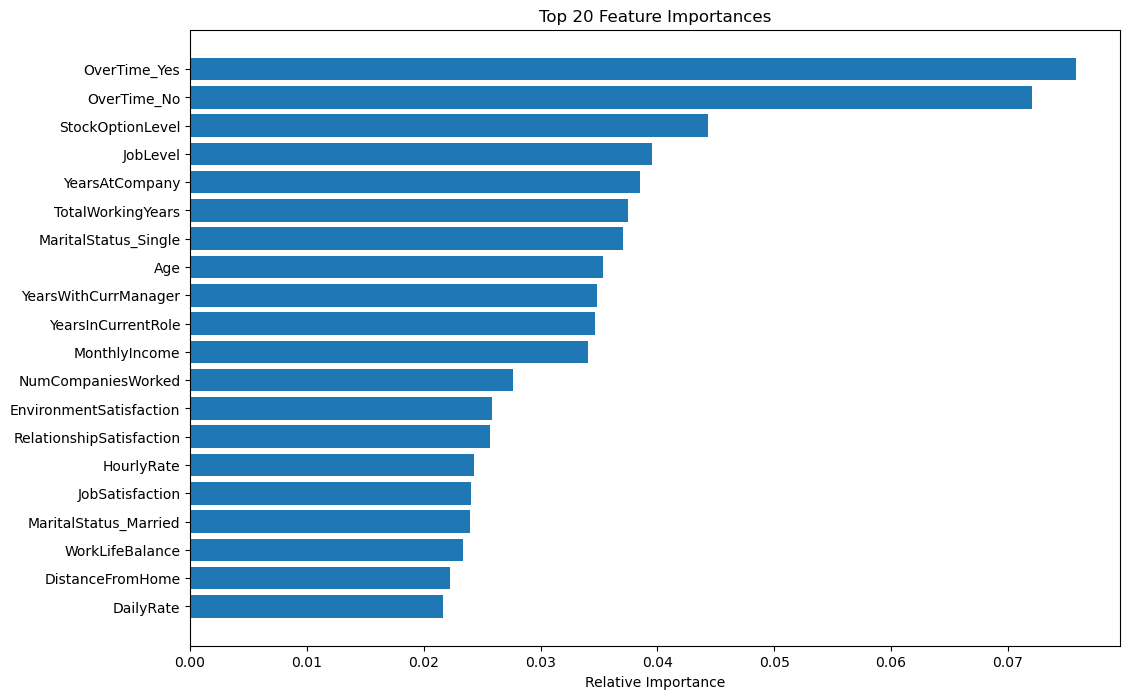

In [16]:
# First, get feature names from the preprocessor (using original X_train)
preprocessor.fit(X_train)  # Fit on original training data
feature_names = (numeric_features.tolist() + 
                list(preprocessor.named_transformers_['cat']
                    .named_steps['onehot']
                    .get_feature_names_out(categorical_features)))

# Get feature importances from the best Random Forest model
importances = best_rf.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 20 features
plt.figure(figsize=(12, 8))
plt.title("Top 20 Feature Importances")
plt.barh(range(20), importances[indices][:20][::-1], align='center')
plt.yticks(range(20), [feature_names[i] for i in indices[:20][::-1]])
plt.xlabel('Relative Importance')
plt.show()

feature importance plot

The image is a horizontal bar chart displaying the "Top 20 Feature Importances."

Variables:

Y-axis: Represents the feature names. These are the independent variables used in a predictive model (likely for predicting employee attrition).
X-axis: Represents "Relative Importance," a numerical value indicating the importance of each feature in the model's predictions. Higher values mean the feature is more important.
Key Observations:

OverTime is the most important feature: Both 'OverTime_Yes' and 'OverTime_No' are the top two features, with 'OverTime_No' slightly more important. This indicates that whether an employee works overtime or not is a very strong predictor of the outcome (presumably attrition).
StockOptionLevel is also important: This feature ranks third, suggesting that stock options significantly influence the outcome.
JobLevel and YearsAtCompany are significant: These features indicate that an employee's position within the company and their tenure are also relevant.
TotalWorkingYears, MaritalStatus_Single, and Age have moderate importance: These demographic and experience-related factors play a role.
YearsWithCurrManager and YearsInCurrentRole are relevant for tenure within the company: These are related to stability and familiarity within the current role.
MonthlyIncome and NumCompaniesWorked have moderate importance: These features are also factors in the model's predictions.
EnvironmentSatisfaction, RelationshipSatisfaction, HourlyRate, JobSatisfaction, and MaritalStatus_Married have relatively lower importance: These factors still contribute but are less influential than the top features.
WorkLifeBalance, DistanceFromHome, and DailyRate are the least important among the top 20: These features have the smallest impact on the model's predictions.
Implications:

Overtime is a critical factor: The strong influence of 'OverTime' (both 'Yes' and 'No') highlights its importance in the model. This is consistent with the earlier observation from the count plot that overtime is a strong predictor of attrition.
Compensation and career progression matter: Stock options, job level, and monthly income all appear in the top 20, indicating that financial incentives and career advancement are important.
Tenure and stability are relevant: Years at the company, total working years, years with the current manager, and years in the current role are significant, suggesting that employee stability and familiarity with their role influence the outcome.
Marital status plays a role: Both 'MaritalStatus_Single' and 'MaritalStatus_Married' are present, though not as highly influential as other factors, indicating that marital status has some predictive power.
Satisfaction and work-life balance are less influential but still relevant: While not as strong as other factors, employee satisfaction and work-life balance do contribute to the model.
Daily rate has the least impact: Among the top 20, daily rate seems to be the least influential.
Overall Interpretation:

This feature importance plot provides valuable insights into the factors that drive the outcome being predicted (likely employee attrition). It emphasizes the importance of overtime, compensation, career progression, and tenure. While satisfaction and work-life balance are relevant, they appear to be less influential than other factors in this specific model.

These insights can be used to prioritize retention strategies. For example, addressing overtime concerns, offering competitive compensation and stock options, and providing career growth opportunities might be more effective than solely focusing on improving general job satisfaction or work-life balance.


Sources and related content
image_f94f5b

. Business Insights and Recommendations

Top 10 factors contributing to attrition:
- OverTime_Yes
- OverTime_No
- StockOptionLevel
- JobLevel
- YearsAtCompany
- TotalWorkingYears
- MaritalStatus_Single
- Age
- YearsWithCurrManager
- YearsInCurrentRole


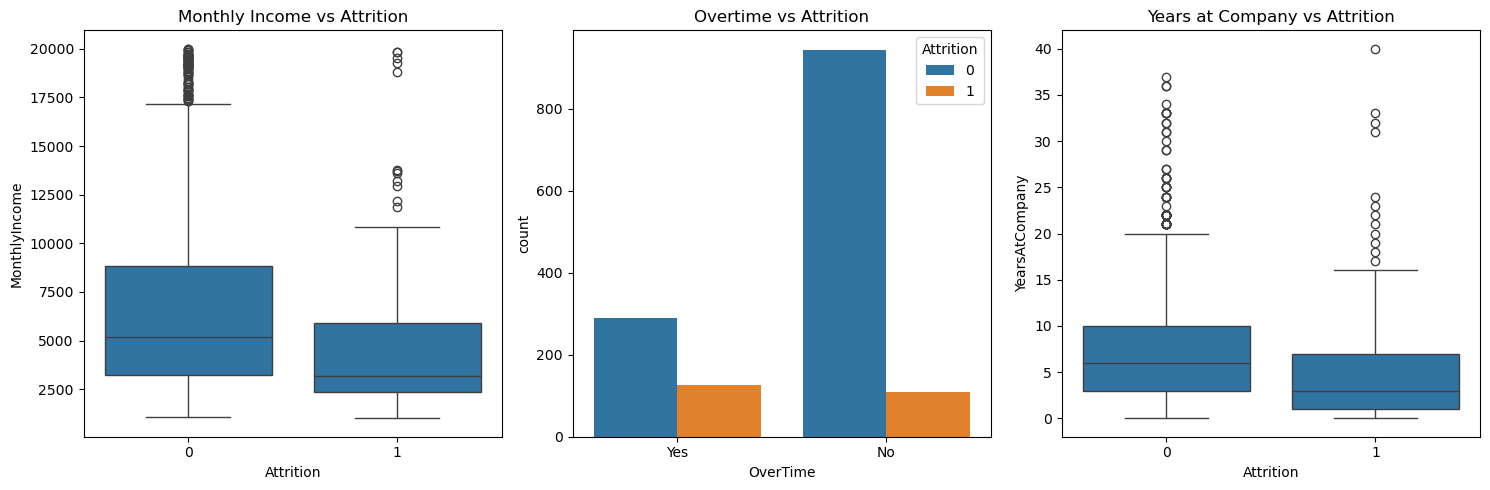

In [17]:
# Analyze key factors contributing to attrition
top_features = [feature_names[i] for i in indices[:10]]
print("Top 10 factors contributing to attrition:")
for feature in top_features:
    print(f"- {feature}")

# Create visualizations for key insights
plt.figure(figsize=(15, 5))

# Monthly Income vs Attrition
plt.subplot(1, 3, 1)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')

# Overtime vs Attrition
plt.subplot(1, 3, 2)
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Overtime vs Attrition')

# Years at Company vs Attrition
plt.subplot(1, 3, 3)
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title('Years at Company vs Attrition')

plt.tight_layout()
plt.show()

MonthlyIncome vs. Attrition.

Variables:

MonthlyIncome: Numerical variable representing the employee's monthly income.
Attrition: Categorical variable (0 = Stayed, 1 = Left).
Analysis:

For Employees Who Stayed (Attrition = 0):

Median MonthlyIncome: Around 5000 - 6000
Interquartile Range (IQR): Approximately 3000 to 8000 - 9000
Range: From around 1000 - 2000 to 17000 - 18000
Outliers: Many high outliers, extending up to 20000.
For Employees Who Left (Attrition = 1):

Median MonthlyIncome: Around 3000
IQR: Approximately 2000 to 5000 - 6000
Range: From around 1000 to 11000
Outliers: Fewer and lower outliers, up to 20000.
Comparison:

Central Tendency: The median monthly income is significantly lower for employees who left compared to those who stayed.
Spread: The IQR and range are also smaller and lower for the attrition group.
Outliers: The "stayed" group has many more and higher-value outliers.
Possible Implications:

Monthly income is a strong differentiating factor in employee attrition. Employees with lower monthly incomes are substantially more likely to leave the company.
The smaller IQR and lower median for the attrition group highlight the concentration of attrition among lower-income earners.
The presence of high-income outliers in both groups suggests that while income is a significant factor, other variables also contribute to attrition for some individuals.
In summary, this box plot reveals a clear inverse relationship between monthly income and attrition. Employees with lower monthly incomes are significantly more likely to leave the company, making income a critical factor to consider in employee retention strategies.


Sources and related content
image_f94f5b


Overtime vs Attrition
Summary of Key Findings from the Images:

A. Factors Associated with Higher Attrition:

Overtime: Working overtime is a strong predictor of attrition.
Lower MonthlyIncome: Lower-earning employees are more likely to leave.
JobLevel: Employees at lower job levels tend to have higher attrition.
NumCompaniesWorked: Employees with a history of working for more companies are more prone to leaving.
Frequent Business Travel: Employees who travel frequently for business show a higher attrition rate.
Single Marital Status: Single employees are more likely to leave than married employees.
Specific Job Roles: Sales Representative and Laboratory Technician roles show relatively higher attrition.
Certain Education Fields: Employees with Marketing or Technical Degrees show a relatively higher attrition rate.
Distance from Home: Employees living further from work might be slightly more likely to leave.
Younger Age: Younger employees may be slightly more likely to leave.
B. Factors with Less Clear or Weaker Association with Attrition:

MonthlyRate: The base monthly rate of pay doesn't seem to strongly predict attrition.
DailyRate: Daily rate has a weak influence on attrition.
Education: Overall education level doesn't strongly differentiate between those who stay and leave.
EnvironmentSatisfaction: While job satisfaction is important, environment satisfaction alone, as shown in the univariate plot, doesn't appear to be a strong predictor.
HourlyRate: Hourly rate has little impact on attrition.
JobInvolvement: Job involvement level doesn't show a clear difference between those who stay and leave.
Gender: The plot suggests a potential slightly higher attrition rate for females, but it needs further statistical confirmation.
C. Other Important Observations:

Department: Attrition rates vary by department, with Sales having a relatively high rate.
Data Imbalance: There are more male employees than female employees, and most employees travel rarely.
Feature Importance: The feature importance plot confirms the strong influence of overtime and also highlights the importance of compensation, career progression, and tenure.

YearsAtCompany vs. Attrition.
Variables:

YearsAtCompany: Numerical variable representing the number of years an employee has been with the company.
Attrition: Categorical variable (0 = Stayed, 1 = Left).
Analysis:

For Employees Who Stayed (Attrition = 0):
Median YearsAtCompany: Around 6-7 years
Interquartile Range (IQR): Approximately 3 to 10 years
Range: From around 0 to 40 years
Outliers: Many outliers above the upper whisker, indicating some long-tenured employees stay.
For Employees Who Left (Attrition = 1):
Median YearsAtCompany: Around 2-3 years
IQR: Approximately 1 to 7 years
Range: From around 0 to 20 years
Outliers: Several outliers, but fewer and generally lower than those in the "stayed" group.
Comparison:

Central Tendency: The median number of years at the company is significantly lower for employees who left compared to those who stayed.
Spread: The IQR and range are also smaller and lower for the attrition group.
Outliers: The "stayed" group has many more and higher-value outliers, indicating that long-tenured employees are more likely to stay, while those who leave tend to have shorter tenures.
Possible Implications:

Tenure is a strong differentiating factor in employee attrition. Employees with shorter tenures are substantially more likely to leave the company.
The smaller IQR and lower median for the attrition group highlight the concentration of attrition among newer employees.
Long-tenured employees are much more likely to stay, suggesting that employee loyalty or investment in the company increases with time.
The outliers in both groups indicate that there are exceptions, with some newer employees staying for a long time and some long-tenured employees eventually leaving.
In summary, this box plot reveals a clear positive relationship between YearsAtCompany and employee retention. Employees with shorter tenures are significantly more likely to leave the company, making tenure a critical factor to consider in employee retention strategies.